In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Correlation Plat : Time Series

In [3]:
df = pd.read_csv("uschange.csv",parse_dates=True,index_col=0)
df

,Consumption,Income,Production,Savings,Unemployment
Quarter,,,,,
1970-03-31,0.615986,0.972261,-2.452700,4.810312,0.9
1970-06-30,0.460376,1.169085,-0.551525,7.287992,0.5
1970-09-30,0.876791,1.553271,-0.358708,7.289013,0.5
1970-12-31,-0.274245,-0.255272,-2.185455,0.985230,0.7
1971-03-31,1.897371,1.987154,1.909734,3.657771,-0.1
...,...,...,...,...,...
2015-09-30,0.664970,0.801663,0.380606,3.180930,-0.3
2015-12-31,0.561680,0.740063,-0.845546,3.482786,0.0
2016-03-31,0.404682,0.519025,-0.417930,2.236534,0.0


In [4]:
df.index

DatetimeIndex(['1970-03-31', '1970-06-30', '1970-09-30', '1970-12-31',
               '1971-03-31', '1971-06-30', '1971-09-30', '1971-12-31',
               '1972-03-31', '1972-06-30',
               ...
               '2014-06-30', '2014-09-30', '2014-12-31', '2015-03-31',
               '2015-06-30', '2015-09-30', '2015-12-31', '2016-03-31',
               '2016-06-30', '2016-09-30'],
              dtype='datetime64[ns]', name='Quarter', length=187, freq=None)

In [5]:
df.index.freq = 'Q'
df.index

DatetimeIndex(['1970-03-31', '1970-06-30', '1970-09-30', '1970-12-31',
               '1971-03-31', '1971-06-30', '1971-09-30', '1971-12-31',
               '1972-03-31', '1972-06-30',
               ...
               '2014-06-30', '2014-09-30', '2014-12-31', '2015-03-31',
               '2015-06-30', '2015-09-30', '2015-12-31', '2016-03-31',
               '2016-06-30', '2016-09-30'],
              dtype='datetime64[ns]', name='Quarter', length=187, freq='Q-DEC')

C:\Users\reece\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


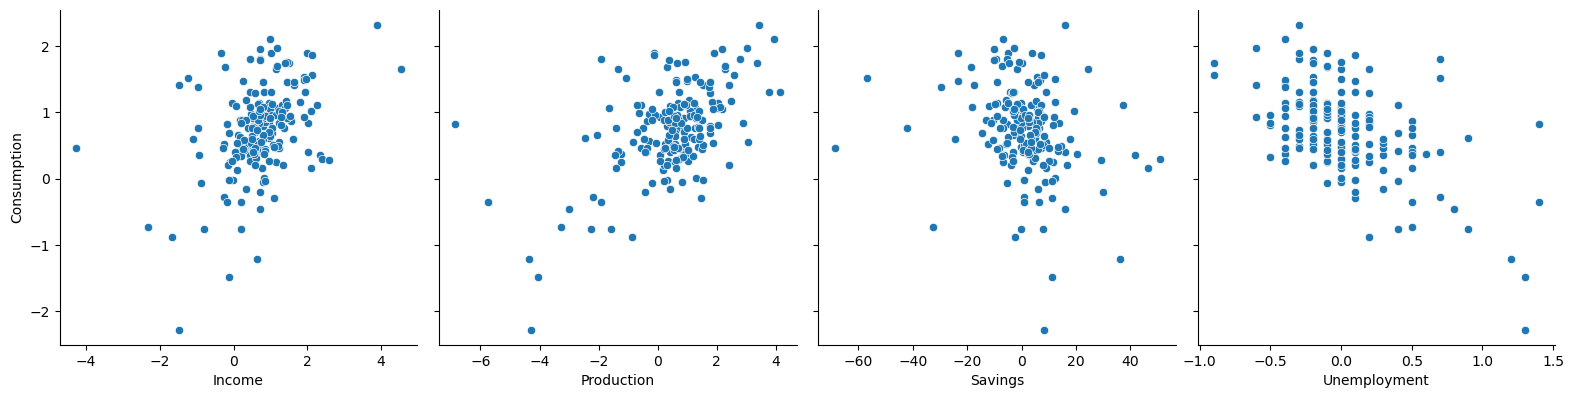

In [7]:
import seaborn as sns
sns.pairplot(df,x_vars=['Income','Production','Savings','Unemployment'],y_vars=['Consumption'],size=4,aspect=1,kind='scatter')
plt.show()

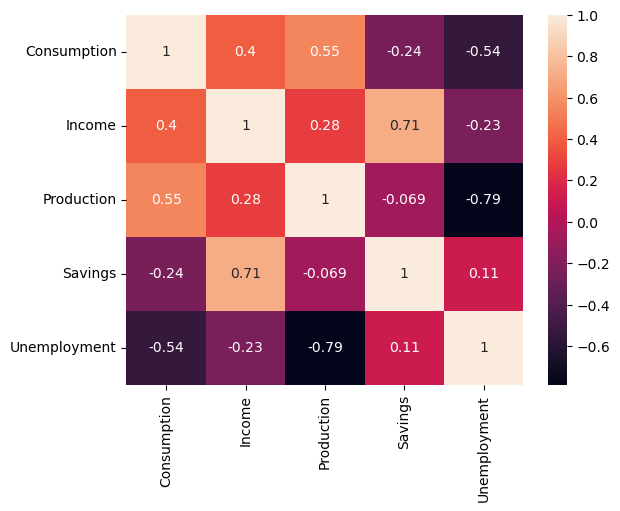

In [9]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.stats.diagnostic as dg
from statsmodels.tools.eval_measures import rmse,rmspe,meanabs,mse
from datetime import datetime,timedelta

In [11]:
X = df['Income']
X

Quarter
1970-03-31    0.972261
1970-06-30    1.169085
1970-09-30    1.553271
1970-12-31   -0.255272
1971-03-31    1.987154
                ...   
2015-09-30    0.801663
2015-12-31    0.740063
2016-03-31    0.519025
2016-06-30    0.723721
2016-09-30    0.644701
Freq: Q-DEC, Name: Income, Length: 187, dtype: float64

In [12]:
X = sm.add_constant(X)
X

,const,Income
Quarter,,
1970-03-31,1.0,0.972261
1970-06-30,1.0,1.169085
1970-09-30,1.0,1.553271
1970-12-31,1.0,-0.255272
1971-03-31,1.0,1.987154
...,...,...
2015-09-30,1.0,0.801663
2015-12-31,1.0,0.740063
2016-03-31,1.0,0.519025


In [13]:
y = df['Consumption']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=False)

In [16]:
model = sm.OLS(y_train,X_train,missing='drop')
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     32.14
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           7.36e-08
Time:                        13:23:03   Log-Likelihood:                -134.83
No. Observations:                 149   AIC:                             273.7
Df Residuals:                     147   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5821      0.067      8.698      0.000       0.450       0.714
Income         0.3246      0.057      5.669      0.000       0.211       0.438
==============================================================================
Omnibus:                       13.938   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.013
Skew:                          -0.446   Prob(JB):                     6.11e-06
Kurtosis:                       4.753   Cond. No.                         2.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
fit.params

const     0.582068
Income    0.324624
dtype: float64

In [20]:
Y_fitted = fit.fittedvalues
y_test_pred = fit.predict(X_test)

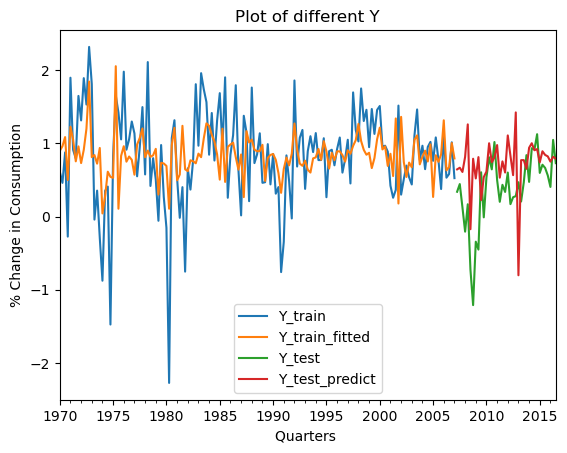

In [22]:
# Plotting the results 
y_train.plot(label='Y_train')
Y_fitted.plot(label='Y_train_fitted')
y_test.plot(label='Y_test')
y_test_pred.plot(label='Y_test_predict')
plt.title('Plot of different Y')
plt.xlabel('Quarters ')
plt.ylabel('% Change in Consumption')
plt.legend()
plt.show()

Text(0, 0.5, 'Consumption % Change')

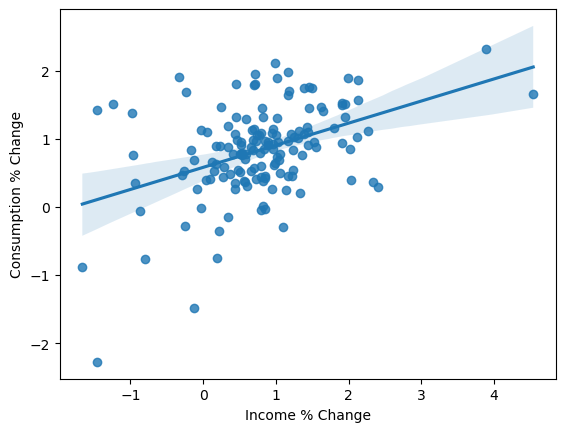

In [24]:
# Regression outcome
sns.regplot(x=X_train['Income'],y=y_train)
plt.xlabel('Income % Change')
plt.ylabel('Consumption % Change')

Text(0, 0.5, 'Predicitive')

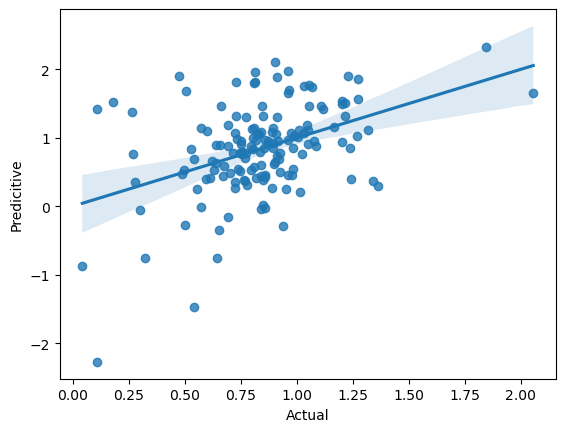

In [25]:
sns.regplot(x=fit.fittedvalues,y=y_train)
plt.xlabel('Actual')
plt.ylabel('Predicitive')

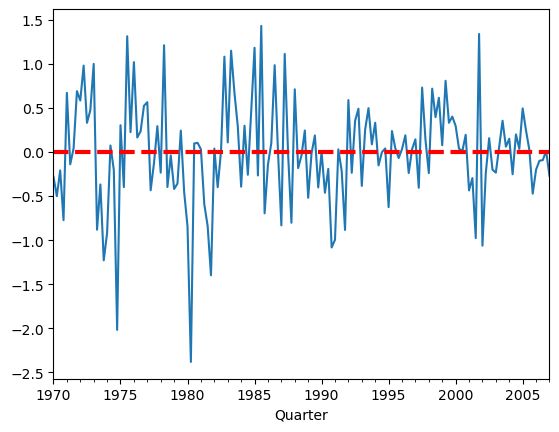

In [26]:
# regression assumptions 
# Mean around 0
fit.resid.plot()
plt.axhline(y=0,color='red',linewidth=3,linestyle='--')

In [27]:
#2 are residuals normally distrubted 

<Axes: ylabel='Frequency'>

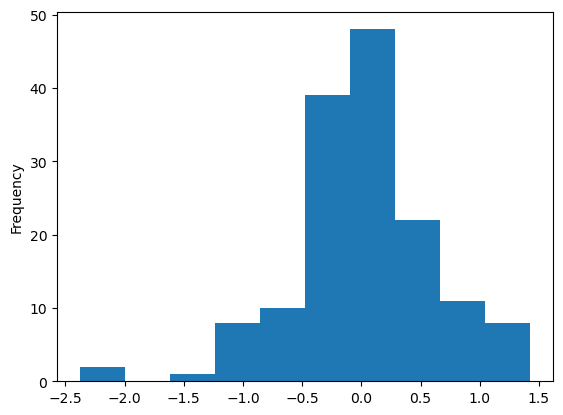

In [28]:
fit.resid.plot(kind='hist')

In [30]:
# 3
# Test for auto correlation

In [34]:
br_geof_test = dg.acorr_breusch_godfrey(fit,nlags=8)
print(br_geof_test[0])
print(br_geof_test[1])
# p-value < 0.05 then auto correlation 

14.599534779793858
0.06741623598548147


C:\Users\reece\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


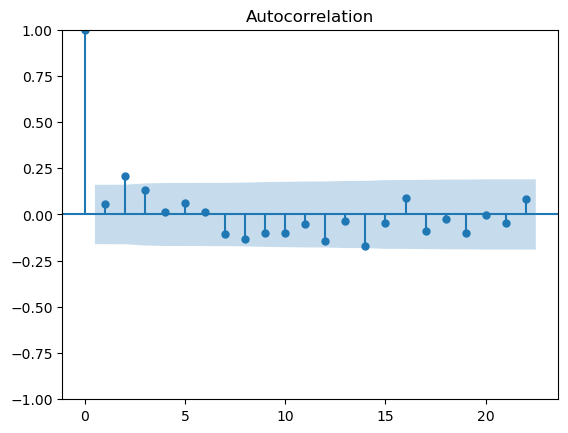

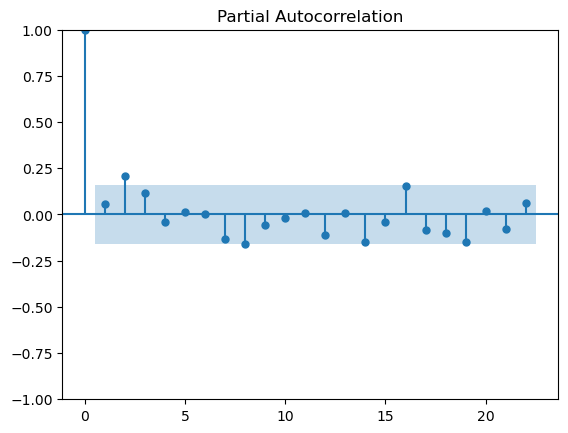

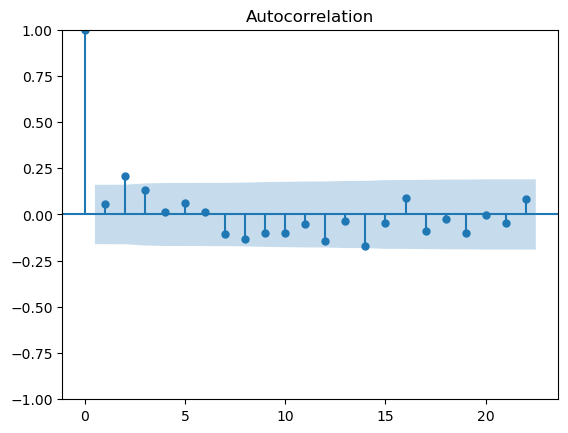

In [33]:
plot_pacf(fit.resid)
plot_acf(fit.resid)

In [35]:
def accuracy(y_test,y_pred):
    from statsmodels.tools.eval_measures import rmse, rmspe, meanabs, mse
    from sktime.performance_metrics.forecasting import mean_absolute_percentage_error  
    RMSE = rmse(y_test,y_pred)
    RMSPE = rmspe(y_test,y_pred)
    MAE = meanabs(y_test,y_pred)
    MSE =  mse(y_test,y_pred)
    MAPE = mean_absolute_percentage_error(y_test,y_pred)    
    print(' Error Statistics : RMSE %f' % RMSE, '    RMSPE %f' % RMSPE, '    MAE %f' % MAE, '    MSE %f' % MSE , '      MAPE %f' % MAPE)

In [36]:
accuracy(y_train,Y_fitted)

 Error Statistics : RMSE 0.598081     RMSPE 62.188554     MAE 0.435448     MSE 0.357700       MAPE 1.581625


In [37]:
accuracy(y_test,y_test_pred)

 Error Statistics : RMSE 0.629835     RMSPE 82.611432     MAE 0.468687     MSE 0.396692       MAPE 2.612911


In [38]:
# Time Series 2 DV and 1 IV

In [46]:
Y = df['Consumption']
X = df[['Income','Savings']]
X = sm.add_constant(X)
model = sm.OLS(Y,X,missing='drop')
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     235.9
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.65e-51
Time:                        13:49:01   Log-Likelihood:                -66.978
No. Observations:                 187   AIC:                             140.0
Df Residuals:                     184   BIC:                             149.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2227      0.036      6.123      0.000       0.151       0.294
Income         0.8171      0.039     20.835      0.000       0.740       0.895
Savings       -0.0512      0.003    -19.172      0.000      -0.057      -0.046
==============================================================================
Omnibus:                       15.964   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.889
Skew:                           0.257   Prob(JB):                     8.02e-10
Kurtosis:                       5.261   Cond. No.                         26.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
accuracy(Y,fit.fittedvalues)

 Error Statistics : RMSE 0.346190     RMSPE 20.690318     MAE 0.242898     MSE 0.119847       MAPE 0.701403


<Axes: xlabel='Quarter'>

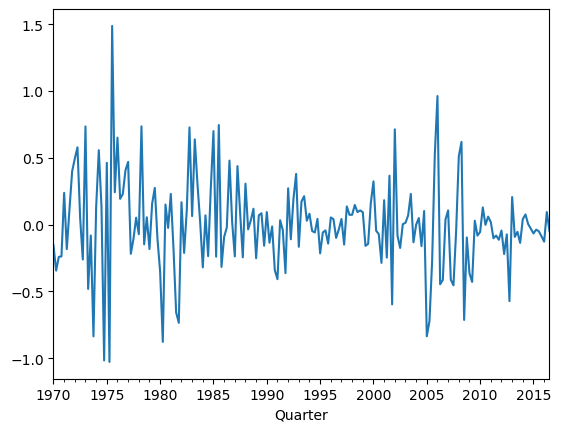

In [49]:
fit.resid.plot()

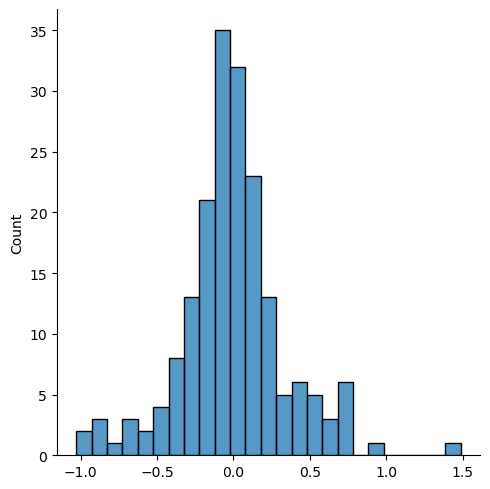

In [50]:
sns.displot(fit.resid)

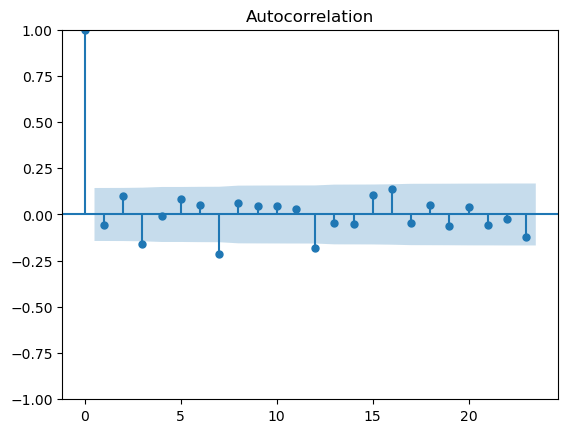

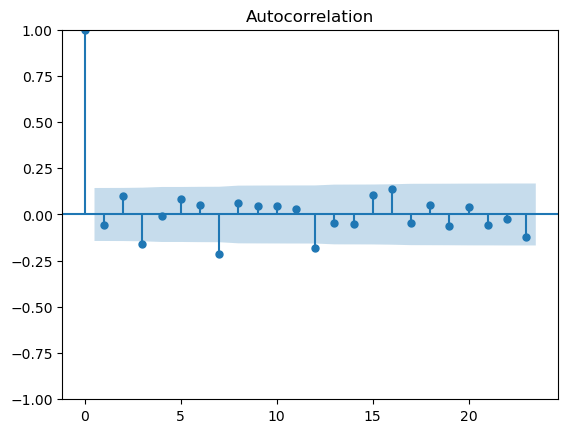

In [51]:
plot_acf(fit.resid)

In [52]:
# Horizon starting 

In [53]:
horizon =pd.date_range(start='2016-12-31',periods=24,freq='Q')
fcast = X.reindex(horizon)
fcast

,const,Income,Savings
2016-12-31,NaN,NaN,NaN
2017-03-31,NaN,NaN,NaN
2017-06-30,NaN,NaN,NaN
2017-09-30,NaN,NaN,NaN
2017-12-31,NaN,NaN,NaN
2018-03-31,NaN,NaN,NaN
2018-06-30,NaN,NaN,NaN
2018-09-30,NaN,NaN,NaN
2018-12-31,NaN,NaN,NaN
2019-03-31,NaN,NaN,NaN


In [54]:
fcast['const'] = 1.0

In [55]:
fcast

,const,Income,Savings
2016-12-31,1.0,NaN,NaN
2017-03-31,1.0,NaN,NaN
2017-06-30,1.0,NaN,NaN
2017-09-30,1.0,NaN,NaN
2017-12-31,1.0,NaN,NaN
2018-03-31,1.0,NaN,NaN
2018-06-30,1.0,NaN,NaN
2018-09-30,1.0,NaN,NaN
2018-12-31,1.0,NaN,NaN
2019-03-31,1.0,NaN,NaN


In [57]:
import random
fcast['Income'] = [random.uniform(0,1) for i in range(len(fcast))]
fcast['Savings'] = [random.uniform(0,1) for i in range(len(fcast))]

In [58]:
fcast

,const,Income,Savings
2016-12-31,1.0,0.969141,0.185171
2017-03-31,1.0,0.578916,0.007774
2017-06-30,1.0,0.992123,0.151248
2017-09-30,1.0,0.647317,0.510884
2017-12-31,1.0,0.388715,0.102405
2018-03-31,1.0,0.938198,0.482265
2018-06-30,1.0,0.587095,0.419510
2018-09-30,1.0,0.108517,0.522854
2018-12-31,1.0,0.412377,0.205663
2019-03-31,1.0,0.304921,0.760704


In [59]:
mean_pred = fit.predict(fcast)
mean_pred

2016-12-31    1.005135
2017-03-31    0.695355
2017-06-30    1.025652
2017-09-30    0.725470
2017-12-31    0.535085
2018-03-31    0.964628
2018-06-30    0.680941
2018-09-30    0.284581
2018-12-31    0.549130
2019-03-31    0.432884
2019-06-30    0.825743
2019-09-30    0.963739
2019-12-31    0.603287
2020-03-31    0.529377
2020-06-30    0.928199
2020-09-30    0.605505
2020-12-31    0.664217
2021-03-31    0.575951
2021-06-30    0.829562
2021-09-30    0.376753
2021-12-31    0.701827
2022-03-31    0.530786
2022-06-30    0.640730
2022-09-30    0.293452
Freq: Q-DEC, dtype: float64

In [61]:
predicitions = fit.get_prediction(fcast)

In [64]:
pred_intervals = predicitions.summary_frame(alpha=0.5)
pred_intervals

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
2016-12-31,1.005135,0.028202,0.986075,1.024195,0.768503,1.241767
2017-03-31,0.695355,0.025812,0.677910,0.712800,0.458847,0.931863
2017-06-30,1.025652,0.028625,1.006306,1.044998,0.788997,1.262308
2017-09-30,0.725470,0.025595,0.708173,0.742767,0.488973,0.961967
2017-12-31,0.535085,0.027778,0.516312,0.553858,0.298476,0.771695
2018-03-31,0.964628,0.027468,0.946064,0.983191,0.728035,1.201221
2018-06-30,0.680941,0.025816,0.663494,0.698389,0.444434,0.917449
2018-09-30,0.284581,0.034085,0.261545,0.307616,0.047595,0.521567
2018-12-31,0.549130,0.027489,0.530552,0.567707,0.312536,0.785724
2019-03-31,0.432884,0.029772,0.412763,0.453004,0.196164,0.669604


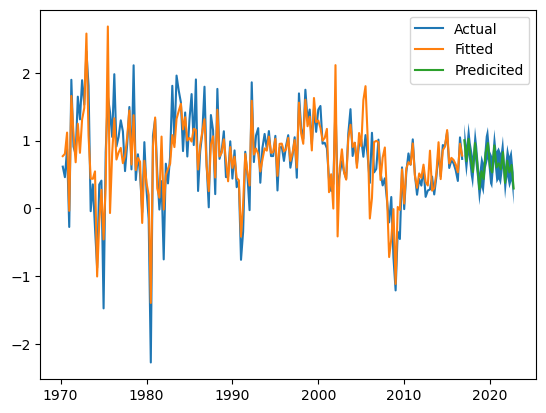

In [65]:
plt.plot(Y.index,Y,label='Actual')
plt.plot(Y.index,fit.fittedvalues,label='Fitted')
plt.plot(horizon,mean_pred,label='Predicited')
plt.fill_between(horizon,pred_intervals['obs_ci_lower'],pred_intervals['obs_ci_upper'])
plt.legend()
plt.show()

In [67]:
# Time Series Seasonality and/or Trend as Predictor Variables 
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [68]:
df = pd.read_csv('marathon.csv',index_col=0,parse_dates=True)
df

,marathon
Year,
1897-01-01,175.166667
1898-01-01,162.000000
1899-01-01,174.633333
1900-01-01,159.733333
1901-01-01,149.383333
...,...
2012-01-01,132.666667
2013-01-01,130.366667
2014-01-01,128.616667


In [70]:
df.index
df.index.freq = 'YS'

<Axes: xlabel='Year'>

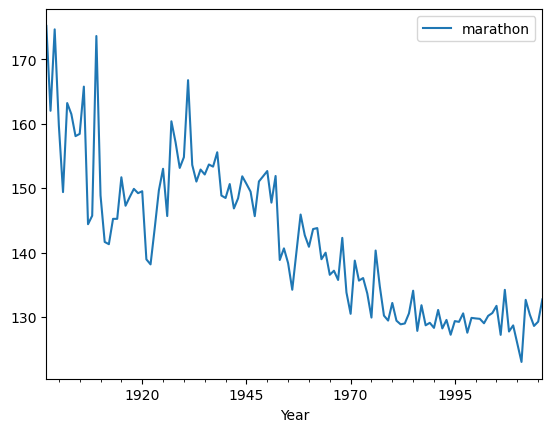

In [71]:
df.plot()

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df,model='additive')
trend = decomp.trend
trend

Year
1897-01-01    175.166667
1898-01-01    162.000000
1899-01-01    174.633333
1900-01-01    159.733333
1901-01-01    149.383333
                 ...    
2012-01-01    132.666667
2013-01-01    130.366667
2014-01-01    128.616667
2015-01-01    129.283333
2016-01-01    132.733333
Freq: AS-JAN, Name: trend, Length: 120, dtype: float64

<Axes: xlabel='Year'>

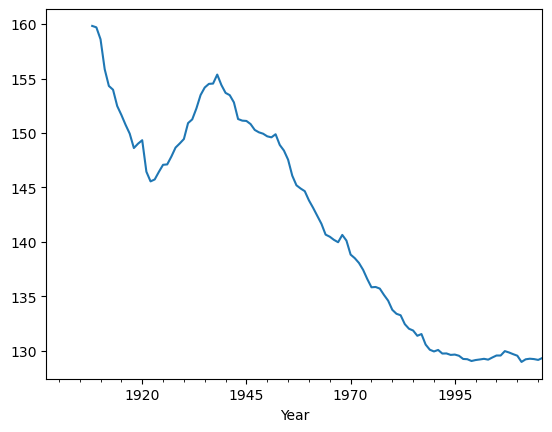

In [75]:
trend_12mo = trend.rolling(12).mean()
trend_12mo.plot()

<Axes: xlabel='Year'>

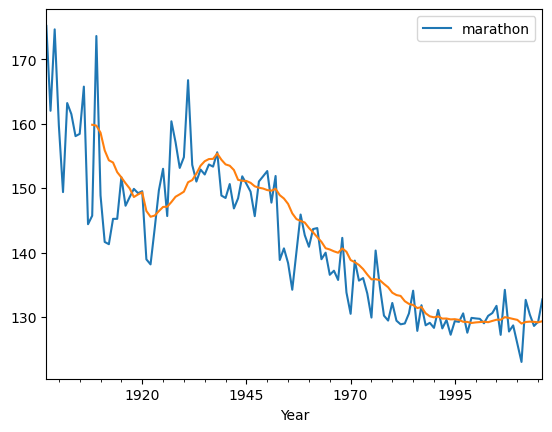

In [76]:
df.plot()
trend_12mo.plot()

In [77]:
trend_12mo = sm.add_constant(trend_12mo)
model = sm.OLS(df,trend_12mo,missing='drop')
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               marathon   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     383.1
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           3.79e-37
Time:                        14:21:07   Log-Likelihood:                -325.40
No. Observations:                 109   AIC:                             654.8
Df Residuals:                     107   BIC:                             660.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3947      6.797      1.088      0.279      -6.080      20.870
trend          0.9375      0.048     19.574      0.000       0.843       1.032
==============================================================================
Omnibus:                       18.535   Durbin-Watson:                   1.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.067
Skew:                           0.631   Prob(JB):                     1.99e-09
Kurtosis:                       5.689   Cond. No.                     2.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
fit.params

const    7.394742
trend    0.937455
dtype: float64

In [111]:
y_fitted = fit.fittedvalues
y_fitted

Year
1908-01-01    157.227363
1909-01-01    157.104973
1910-01-01    156.078981
1911-01-01    153.502282
1912-01-01    152.062247
                 ...    
2012-01-01    128.541246
2013-01-01    128.592025
2014-01-01    128.559474
2015-01-01    128.489165
2016-01-01    128.654522
Freq: AS-JAN, Length: 109, dtype: float64

In [80]:
start_date = datetime(year=2017,month=1,day=1)
start_date

datetime.datetime(2017, 1, 1, 0, 0)

In [91]:
horizon = pd.date_range(start=start_date,periods=12,freq='YS')
fcast = pd.DataFrame([129,135,133,135,124,126,135,133,130,128,136,129],index=horizon,columns=['trend_12mo'])

In [92]:
fcast

,trend_12mo
2017-01-01,129
2018-01-01,135
2019-01-01,133
2020-01-01,135
2021-01-01,124
2022-01-01,126
2023-01-01,135
2024-01-01,133
2025-01-01,130
2026-01-01,128


In [108]:
fcast = sm.add_constant(fcast)
y_pred = fit.predict(fcast)
y_pred

2017-01-01    128.326413
2018-01-01    133.951141
2019-01-01    132.076232
2020-01-01    133.951141
2021-01-01    123.639138
2022-01-01    125.514048
2023-01-01    133.951141
2024-01-01    132.076232
2025-01-01    129.263867
2026-01-01    127.388958
2027-01-01    134.888596
2028-01-01    128.326413
Freq: AS-JAN, dtype: float64

In [112]:
# Auto Regression model

In [116]:
import pandas as pd
import pandas_datareader as pdr
from statsmodels.tsa.api import acf,graphics,pacf
from statsmodels.tsa.ar_model import AutoReg,ar_select_order

In [117]:
df = pd.read_csv('housing_starts.csv',parse_dates=True,index_col=0)
df

,HousingStarts
Month,
1959-02-01,291.060291
1959-03-01,2898.989899
1959-04-01,1808.927173
1959-05-01,112.732095
1959-06-01,-308.196721
...,...
2019-02-01,-804.597701
2019-03-01,2275.000000
2019-04-01,1873.727088


<Axes: xlabel='Month'>

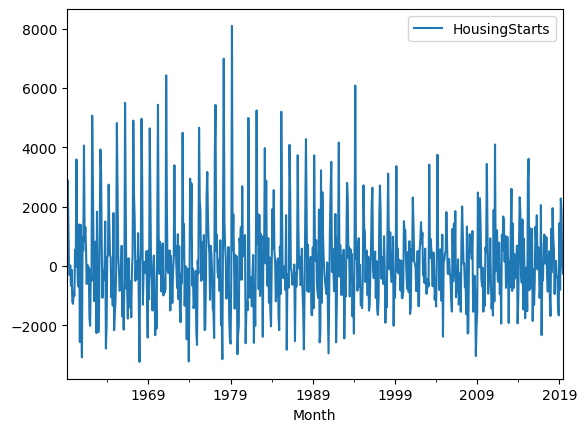

In [118]:
df.plot()

In [119]:
model = AutoReg(df,3)
fit = model.fit()
print(fit.summary())

                            AutoReg Model Results                             
Dep. Variable:          HousingStarts   No. Observations:                  725
Model:                     AutoReg(3)   Log Likelihood               -6318.375
Method:               Conditional MLE   S.D. of innovations           1528.853
Date:                Wed, 19 Jul 2023   AIC                          12646.749
Time:                        14:49:03   BIC                          12669.659
Sample:                    05-01-1959   HQIC                         12655.593
                         - 06-01-2019                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              112.2765     57.265      1.961      0.050       0.040     224.513
HousingStarts.L1     0.1910      0.036      5.235      0.000       0.120       0.263
HousingStarts.L2     0.0058 

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [120]:
best_lagr = ar_select_order(df,13,glob=True)
best_lagr.ar_lags

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


[1, 4, 8, 11, 12, 13]

In [121]:
fit = best_lagr.model.fit()
print(fit.summary())

                            AutoReg Model Results                             
Dep. Variable:          HousingStarts   No. Observations:                  725
Model:             Restr. AutoReg(13)   Log Likelihood               -5965.610
Method:               Conditional MLE   S.D. of innovations           1053.347
Date:                Wed, 19 Jul 2023   AIC                          11947.221
Time:                        14:51:09   BIC                          11983.765
Sample:                    03-01-1960   HQIC                         11961.336
                         - 06-01-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                47.2878     40.529      1.167      0.243     -32.147     126.722
HousingStarts.L1     -0.2528      0.034     -7.353      0.000      -0.320      -0.185
HousingStarts.L4     -0.

In [123]:
# seasonal dummy varibles
best_lagr = ar_select_order(df,13,glob=True,seasonal=True)
best_lagr.ar_lags
fit = best_lagr.model.fit()
print(fit.summary())

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               AutoReg Model Results                                
Dep. Variable:                HousingStarts   No. Observations:                  725
Model:             Restr. Seas. AutoReg(13)   Log Likelihood               -5870.464
Method:                     Conditional MLE   S.D. of innovations            921.585
Date:                      Wed, 19 Jul 2023   AIC                          11776.928
Time:                              14:52:43   BIC                          11859.153
Sample:                          03-01-1960   HQIC                         11808.688
                               - 06-01-2019                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               287.7806    143.171      2.010      0.044       7.170     568.391
s(2,12)            2485.9814    215.537     11.534      0.000 

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


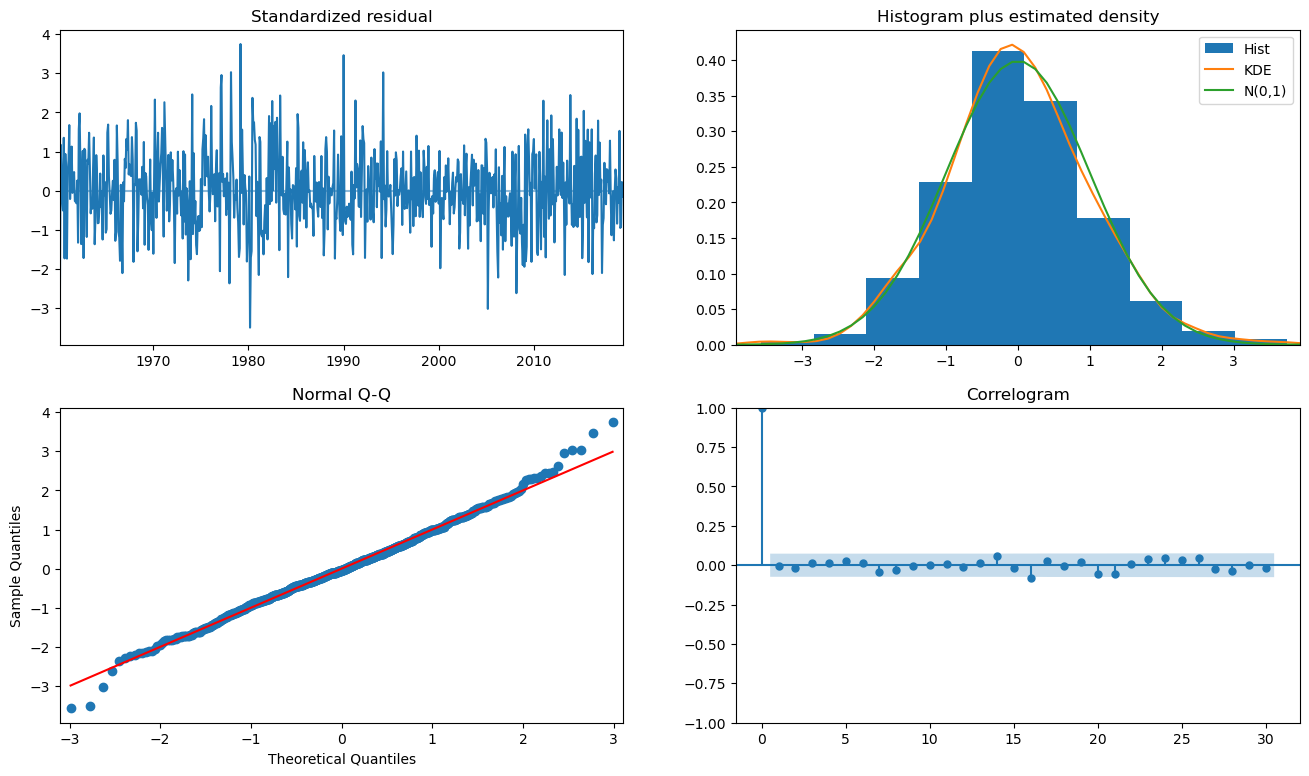

In [126]:
fig = plt.figure(figsize=(16,9))
fig = fit.plot_diagnostics(fig=fig,lags=30)

In [128]:
start_date = datetime(year=2019,month=7,day=1)
start_date

datetime.datetime(2019, 7, 1, 0, 0)

In [129]:
horizon = pd.date_range(start=start_date,periods=24,freq='MS')
horizon

DatetimeIndex(['2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01'],
              dtype='datetime64[ns]', freq='MS')

In [130]:
fcast = df.reindex(horizon)
fcast

,HousingStarts
2019-07-01,NaN
2019-08-01,NaN
2019-09-01,NaN
2019-10-01,NaN
2019-11-01,NaN
2019-12-01,NaN
2020-01-01,NaN
2020-02-01,NaN
2020-03-01,NaN
2020-04-01,NaN


In [132]:
pred_mean = fit.predict(start = len(df),end=len(df)+24,dynamic=False)
pred_mean

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:435: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2019-07-01    -366.376317
2019-08-01      58.830355
2019-09-01    -450.582999
2019-10-01     201.107440
2019-11-01   -1859.385793
2019-12-01   -1258.960500
2020-01-01     -39.492267
2020-02-01     327.428216
2020-03-01    2925.589014
2020-04-01    1471.528990
2020-05-01     463.215474
2020-06-01    -134.429683
2020-07-01    -374.043527
2020-08-01    -103.482353
2020-09-01    -374.461146
2020-10-01     231.971651
2020-11-01   -1687.197243
2020-12-01   -1466.927512
2021-01-01    -266.365903
2021-02-01     414.199383
2021-03-01    3200.767402
2021-04-01    1400.642046
2021-05-01     445.508829
2021-06-01     -20.359035
2021-07-01    -398.396669
Freq: MS, dtype: float64

In [133]:
fcast['Housing'] = pred_mean
fcast

,HousingStarts,Housing
2019-07-01,NaN,-366.376317
2019-08-01,NaN,58.830355
2019-09-01,NaN,-450.582999
2019-10-01,NaN,201.107440
2019-11-01,NaN,-1859.385793
2019-12-01,NaN,-1258.960500
2020-01-01,NaN,-39.492267
2020-02-01,NaN,327.428216
2020-03-01,NaN,2925.589014
2020-04-01,NaN,1471.528990


In [134]:
pred_table = fit.get_prediction(start=len(df),end=len(df)+24,dynamic=False)

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:435: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [135]:
mean = pred_table.predicted_mean
mean

2019-07-01    -366.376317
2019-08-01      58.830355
2019-09-01    -450.582999
2019-10-01     201.107440
2019-11-01   -1859.385793
2019-12-01   -1258.960500
2020-01-01     -39.492267
2020-02-01     327.428216
2020-03-01    2925.589014
2020-04-01    1471.528990
2020-05-01     463.215474
2020-06-01    -134.429683
2020-07-01    -374.043527
2020-08-01    -103.482353
2020-09-01    -374.461146
2020-10-01     231.971651
2020-11-01   -1687.197243
2020-12-01   -1466.927512
2021-01-01    -266.365903
2021-02-01     414.199383
2021-03-01    3200.767402
2021-04-01    1400.642046
2021-05-01     445.508829
2021-06-01     -20.359035
2021-07-01    -398.396669
Freq: MS, Name: predicted_mean, dtype: float64

In [137]:
pred_intervals = pred_table.conf_int(0.05)
lower = pred_intervals.lower
upper = pred_intervals.upper

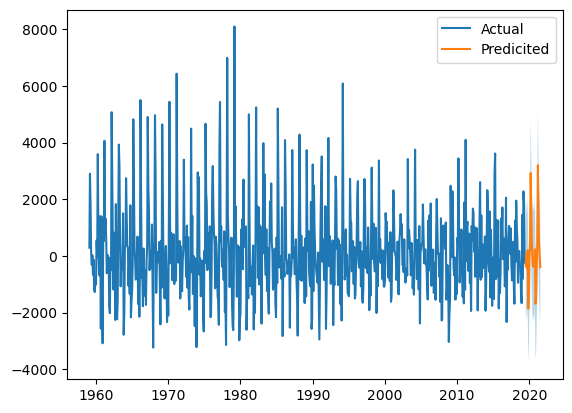

In [138]:
plt.plot(df.index,df['HousingStarts'],label='Actual')
plt.plot(mean.index,mean,label='Predicited')
plt.fill_between(mean.index,lower,upper,alpha=0.3)
plt.legend()
plt.show()

In [139]:
# Vector Auto Regression

In [140]:
from statsmodels.tsa.api import VAR

In [141]:
df = pd.read_csv('realgdp.csv',index_col=0,parse_dates=True)
df

,realgdp,realcons,realinv
1959-06-30,0.024942,0.015286,0.080213
1959-09-30,-0.001193,0.010386,-0.072131
1959-12-31,0.003495,0.001084,0.034425
1960-03-31,0.022190,0.009534,0.102664
1960-06-30,-0.004685,0.012572,-0.106694
...,...,...,...
2008-09-30,-0.006781,-0.008948,-0.017836
2008-12-31,-0.013805,-0.007843,-0.069165
2009-03-31,-0.016612,0.001511,-0.175598
2009-06-30,-0.001851,-0.002196,-0.067561


<Axes: >

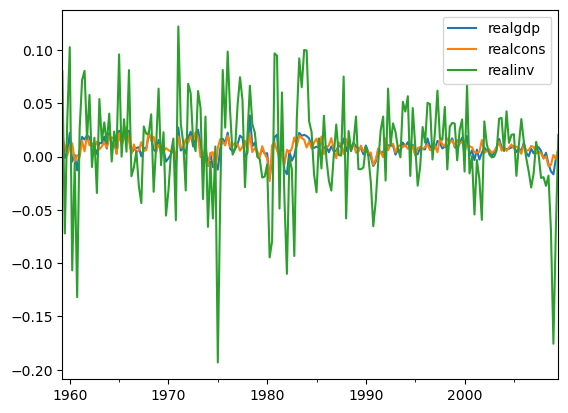

In [142]:
df.plot()

In [143]:
model = VAR(df)

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


In [144]:
fit = model.fit(2)
fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 19, Jul, 2023
Time:                     15:14:26
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.172
L1.realgdp         -0.279435         0.169663           -1.647           0.100
L1.realcons         0.675016         0.131285            5.142    

In [145]:
fit  = model.fit(maxlags=15,ic='aic')
best_lag = fit.k_ar
fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 19, Jul, 2023
Time:                     15:16:53
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.4257
Nobs:                     199.000    HQIC:                  -27.7212
Log likelihood:           1961.15    FPE:                7.47593e-13
AIC:                     -27.9222    Det(Omega_mle):     6.45336e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001281         0.001295            0.989           0.322
L1.realgdp         -0.286148         0.171582           -1.668           0.095
L1.realcons         0.673869         0.132245            5.096    

In [148]:
fcast = fit.forecast(df.values[-best_lag:],12)
fcast

array([[ 0.00616044,  0.00500006,  0.00916198],
       [ 0.00427559,  0.00344836, -0.00238478],
       [ 0.00416634,  0.0070728 , -0.01193629],
       [ 0.00557873,  0.00642784,  0.00147152],
       [ 0.00626431,  0.00666715,  0.00379567],
       [ 0.00651738,  0.00764936,  0.00198474],
       [ 0.00690284,  0.00760909,  0.00548495],
       [ 0.00714517,  0.00775843,  0.00620737],
       [ 0.007258  ,  0.0079993 ,  0.00602391],
       [ 0.00738975,  0.00804623,  0.00690895],
       [ 0.00748038,  0.00810761,  0.00722217],
       [ 0.00753147,  0.00817359,  0.00730209]])

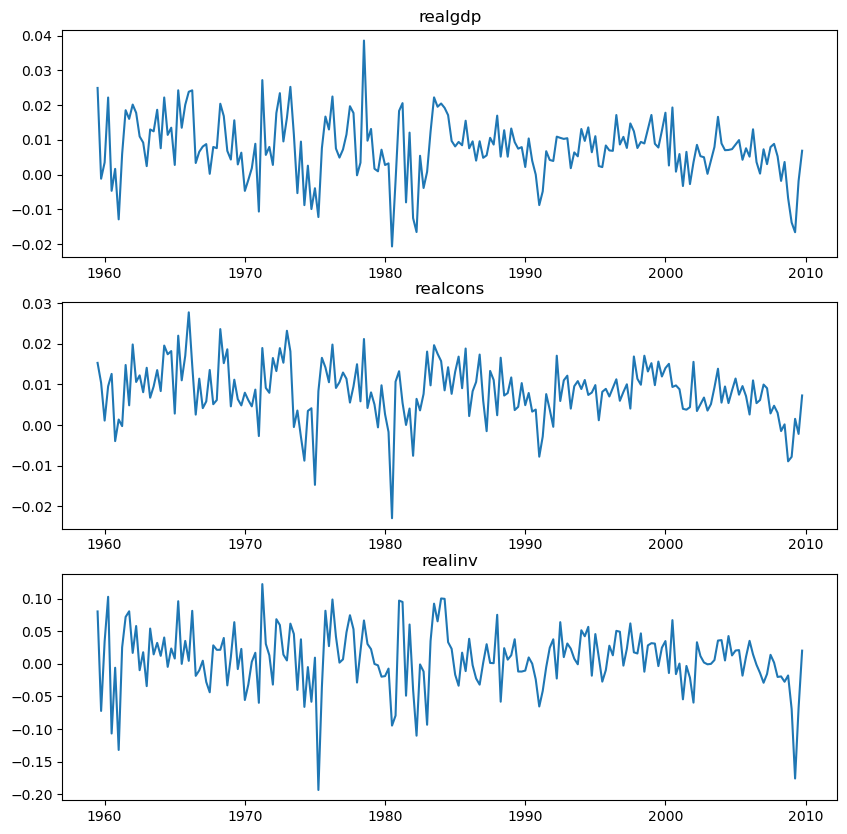

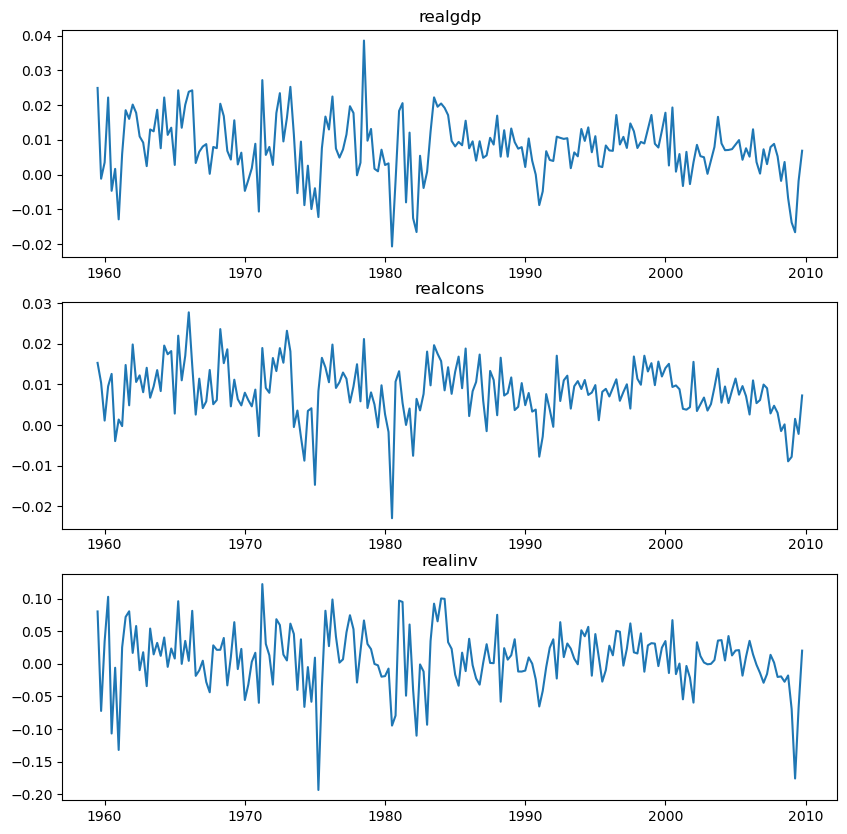

In [149]:
fit.plot()

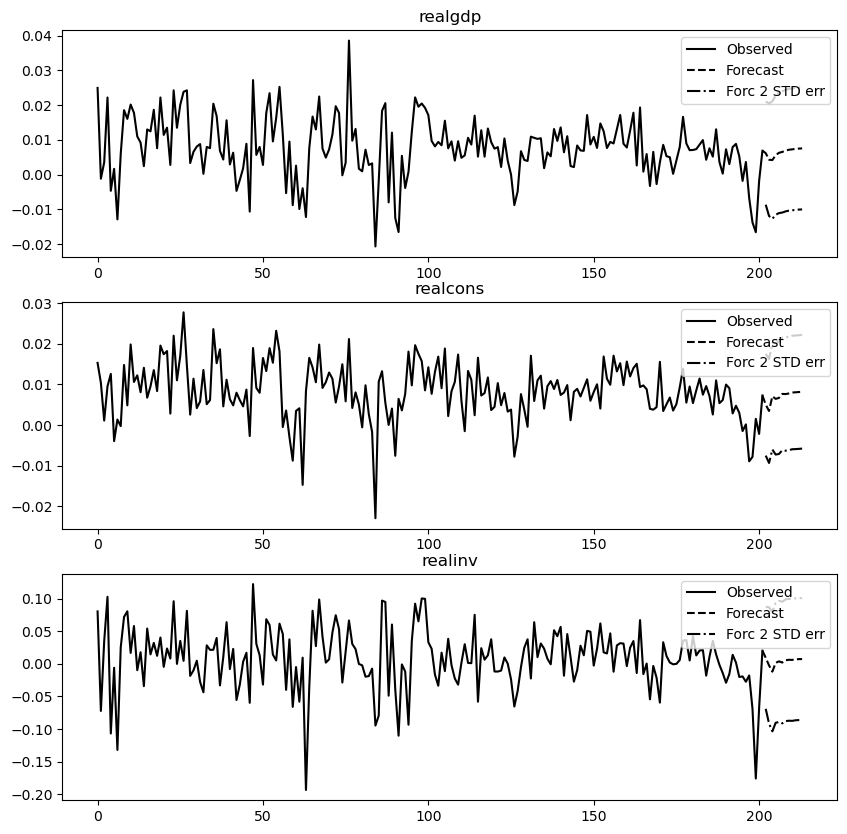

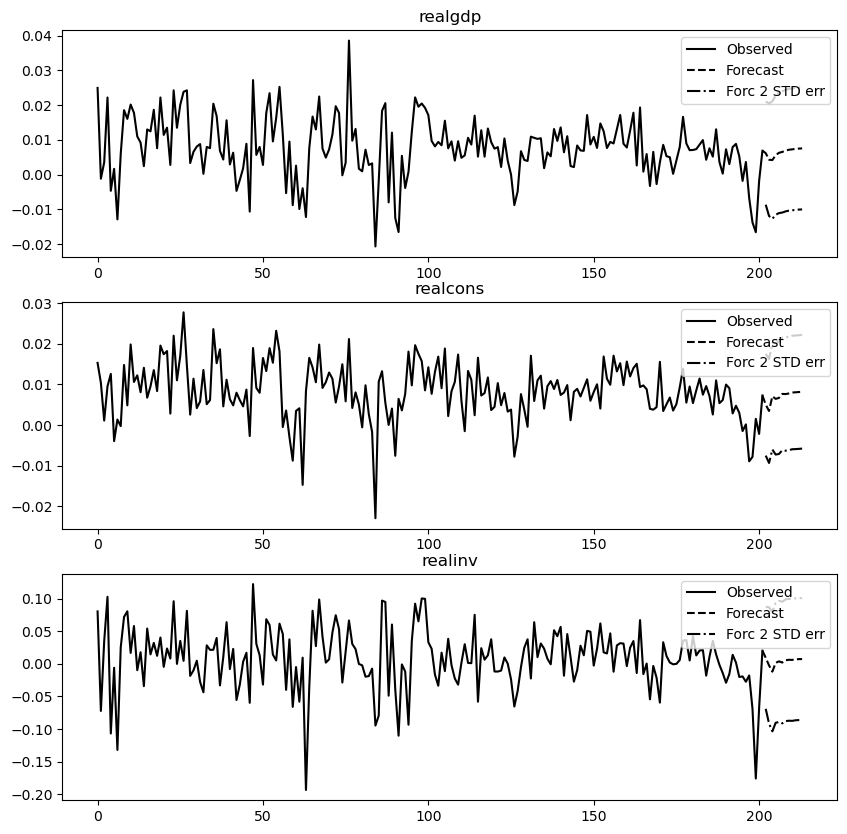

In [151]:
fit.plot_forecast(12)

In [152]:
mid,lower,upper = fit.forecast_interval(df.values[-best_lag:],24,alpha=0.05)

In [153]:
mid

array([[ 0.00616044,  0.00500006,  0.00916198],
       [ 0.00427559,  0.00344836, -0.00238478],
       [ 0.00416634,  0.0070728 , -0.01193629],
       [ 0.00557873,  0.00642784,  0.00147152],
       [ 0.00626431,  0.00666715,  0.00379567],
       [ 0.00651738,  0.00764936,  0.00198474],
       [ 0.00690284,  0.00760909,  0.00548495],
       [ 0.00714517,  0.00775843,  0.00620737],
       [ 0.007258  ,  0.0079993 ,  0.00602391],
       [ 0.00738975,  0.00804623,  0.00690895],
       [ 0.00748038,  0.00810761,  0.00722217],
       [ 0.00753147,  0.00817359,  0.00730209],
       [ 0.00757578,  0.00820132,  0.0075285 ],
       [ 0.00760728,  0.00822396,  0.00764454],
       [ 0.00762707,  0.0082439 ,  0.00769827],
       [ 0.00764229,  0.00825535,  0.00776287],
       [ 0.0076532 ,  0.00826353,  0.00780397],
       [ 0.00766046,  0.00827   ,  0.00782735],
       [ 0.00766574,  0.00827422,  0.0078477 ],
       [ 0.00766952,  0.00827714,  0.00786189],
       [ 0.0076721 ,  0.00827932,  0.007

In [155]:
lower

array([[-0.00868759, -0.00754378, -0.06892279],
       [-0.01193976, -0.00935152, -0.0914204 ],
       [-0.01275828, -0.00602883, -0.10338105],
       [-0.01159022, -0.00728638, -0.09027766],
       [-0.01109592, -0.00713698, -0.08901364],
       [-0.01094647, -0.00622477, -0.09112587],
       [-0.01060691, -0.00633444, -0.08769195],
       [-0.01039497, -0.00620492, -0.08708826],
       [-0.01029812, -0.00597585, -0.08731555],
       [-0.01017377, -0.00593706, -0.08644493],
       [-0.01008732, -0.00587886, -0.08614471],
       [-0.0100384 , -0.00581456, -0.08607054],
       [-0.00999513, -0.0057878 , -0.08584644],
       [-0.00996417, -0.00576559, -0.08573188],
       [-0.00994466, -0.00574587, -0.08567887],
       [-0.00992957, -0.00573454, -0.08561459],
       [-0.00991873, -0.00572642, -0.08557367],
       [-0.0099115 , -0.00571998, -0.08555037],
       [-0.00990624, -0.00571577, -0.08553007],
       [-0.00990247, -0.00571286, -0.0855159 ],
       [-0.00989989, -0.00571068, -0.085

In [156]:
upper

array([[0.02100848, 0.01754389, 0.08724675],
       [0.02049094, 0.01624823, 0.08665083],
       [0.02109095, 0.02017444, 0.07950847],
       [0.02274767, 0.02014207, 0.0932207 ],
       [0.02362453, 0.02047128, 0.09660498],
       [0.02398124, 0.0215235 , 0.09509536],
       [0.02441259, 0.02155261, 0.09866185],
       [0.0246853 , 0.02172178, 0.099503  ],
       [0.02481411, 0.02197445, 0.09936337],
       [0.02495328, 0.02202952, 0.10026283],
       [0.02504809, 0.02209408, 0.10058904],
       [0.02510135, 0.02216173, 0.10067472],
       [0.02514668, 0.02219044, 0.10090343],
       [0.02517873, 0.02221352, 0.10102097],
       [0.02519879, 0.02223368, 0.10107541],
       [0.02521415, 0.02224525, 0.10114033],
       [0.02522513, 0.02225348, 0.10118161],
       [0.02523242, 0.02225998, 0.10120508],
       [0.02523772, 0.02226421, 0.10122547],
       [0.0252415 , 0.02226714, 0.10123968],
       [0.02524409, 0.02226932, 0.10124861],
       [0.02524593, 0.02227082, 0.10125541],
       [0.

In [157]:
start_date = datetime(year=2009,month=12,day=31)
horizon = pd.date_range(start=start_date,periods=24,freq='Q')
fcastmid = pd.DataFrame(mid,index=horizon,columns= ['realgdp','realcons','realinv'])
fcastlower = pd.DataFrame(lower,index=horizon,columns= ['realgdp','realcons','realinv'])
fcastupper = pd.DataFrame(upper,index=horizon,columns= ['realgdp','realcons','realinv'])

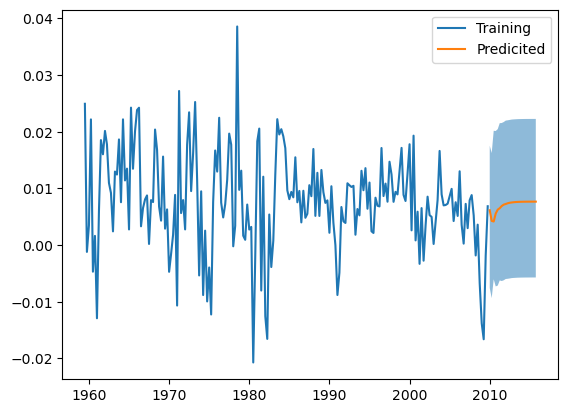

In [158]:
plt.plot(df.index,df['realgdp'],label='Training')
plt.plot(horizon,fcastmid['realgdp'],label='Predicited')
plt.fill_between(horizon,fcastlower.iloc[:,1],fcastupper.iloc[:,1],alpha=0.5)
plt.legend()
plt.show()

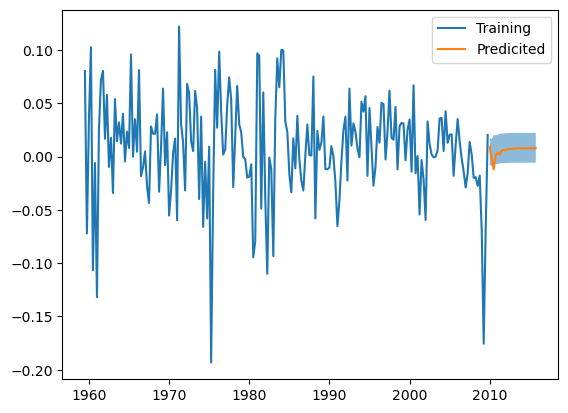

In [159]:
plt.plot(df.index,df['realinv'],label='Training')
plt.plot(horizon,fcastmid['realinv'],label='Predicited')
plt.fill_between(horizon,fcastlower.iloc[:,1],fcastupper.iloc[:,1],alpha=0.5)
plt.legend()
plt.show()

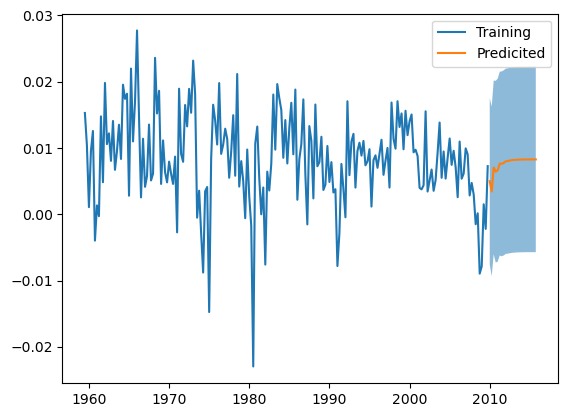

In [160]:
plt.plot(df.index,df['realcons'],label='Training')
plt.plot(horizon,fcastmid['realcons'],label='Predicited')
plt.fill_between(horizon,fcastlower.iloc[:,1],fcastupper.iloc[:,1],alpha=0.5)
plt.legend()
plt.show()